# Public Health Agency Case Study

## Define Task

I will be using the Open Foods dataset in order to collect nutritional data on different products from around the world.

I will be implementing PCA for dimensionality reduction and the KMeans algorithm to cluster the food products into clusters based on their nutritional content.

#### Import core packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("All 4 libraries are succesfully imported! :)")

All 4 libraries are succesfully imported! :)


#### Import the dataset

In [2]:
openFoods = pd.read_csv('/Users/user/Desktop/Openfoods.csv', sep = '\t', low_memory = False)
openFoods.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

#### Get an overview of the dataset at hand (check shape & size)

In [3]:
print('The shape of the above dataset is:', openFoods.shape)
print('The size of the above dataset is:', openFoods.size)

The shape of the above dataset is: (320772, 162)
The size of the above dataset is: 51965064


#### Remove all the features that only contain nulls

In [4]:
openFoods.dropna(axis = 1, how ='all', inplace = True)
print('The shape of the above dataset is:', openFoods.shape)
print('The size of the above dataset is:', openFoods.size)

The shape of the above dataset is: (320772, 146)
The size of the above dataset is: 46832712


#### Remove all duplicate lines

In [5]:
#Remove all the duplicates based on 'product name' to minimize dataset size
openFoods.drop_duplicates(subset = 'product_name', keep = False, inplace = True)
print('The shape of the above dataset is:', openFoods.shape)
print('The size of the above dataset is:', openFoods.size)

The shape of the above dataset is: (196915, 146)
The size of the above dataset is: 28749590


#### Keep only the features that have more than 100,000 data points

In [6]:
openFoods.dropna(axis = 1, how = 'any', thresh = 100000, inplace = True)
openFoods.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

#### Create a new dataset with the reduced information (taking only the features of interest)

In [7]:
healthData = openFoods[['product_name', 'countries', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', \
                        'proteins_100g', 'additives_n', 'saturated-fat_100g', \
                        'sugars_100g', 'salt_100g']]


healthData.set_index('product_name', inplace = True) #make product column as the index
healthData.head()

,countries,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,additives_n,saturated-fat_100g,sugars_100g,salt_100g
product_name,,,,,,,,,
Banana Chips Sweetened (Whole),US,28.57,64.29,3.6,3.57,0.0,28.57,14.29,0.00000
Organic Salted Nut Mix,US,57.14,17.86,7.1,17.86,0.0,5.36,3.57,1.22428
Breadshop Honey Gone Nuts Granola,US,18.27,63.46,7.7,13.46,0.0,1.92,11.54,NaN
Organic Dark Chocolate Minis,US,37.50,55.00,7.5,5.00,0.0,22.50,42.50,NaN
Organic Adzuki Beans,US,1.04,62.50,12.5,22.92,0.0,NaN,NaN,NaN


#### Clean the 'countries' column

*Function 1 - Take the first part of the string in the country column*

In [8]:
#Treat NAs in country column as string
healthData.countries = healthData.countries.astype(str)

#Define function that takes the first part of the string in the countries column
def first(string):
    parts = string.split(',')
    first_part = parts[0]
    if len(parts) >= 2:
        print('- There are several parts in "{}", we will keep only "{}"'.format(parts, first_part))
    return first_part

#Apply the function
healthData['countries'] = healthData['countries'].apply(first)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


- There are several parts in "['France', ' US']", we will keep only "France"
- There are several parts in "['France', ' US']", we will keep only "France"
- There are several parts in "['France', 'Royaume-Uni']", we will keep only "France"
- There are several parts in "['UK', 'France']", we will keep only "UK"
- There are several parts in "['UK', 'France']", we will keep only "UK"
- There are several parts in "['UK', 'France']", we will keep only "UK"
- There are several parts in "['France', 'Belgique', 'Pays-Bas', 'Royaume-Uni']", we will keep only "France"
- There are several parts in "['France', 'United Kingdom']", we will keep only "France"
- There are several parts in "['UK', 'France']", we will keep only "UK"
- There are several parts in "['France', 'UK']", we will keep only "France"
- There are several parts in "['France', 'UK']", we will keep only "France"
- There are several parts in "['France', 'United Kingdom']", we will keep only "France"
- There are several parts in "['UK',

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


*Function 2 - Unify country names in order to make the list coherent*

In [9]:
#Create countries dictionary to bulk replace the names
countries_to_replace = {'Suisse' : 'Switzerland', 'Deutschland': 'Germany',
                       'España': 'Spain','US': 'United States',
                       'en:FR': 'France', 'en:GB': 'United Kingdom',
                       'en:US': 'United States', 'USA': 'United States',
                       'Nederland': 'Netherlands', 'Pays-Bas': 'Netherlands',
                       'en:CH': 'China', 'en:CA': 'Canada',
                       'en:ES': 'Spain', 'en:AU': 'Australia',
                        'États-Unis': 'United States',
                        'Australie' : 'Australia', 'en:DE': 'Germany',
                        'Italia' : 'Italy', 'Brasil' : 'Brazil',
                        'en:CZ' : 'Czech Republic', 'Belgique' : 'Belgium',
                        'Россия' : 'Russia', 'en:JP' : 'Japan',
                        'Allemagne' : 'Germany', 'Royaume-Uni' : 'United Kingdom',
                        'en:BE' : 'Belgium', 'en:VE' : 'Venezuela',
                        'en:BR' : 'Brazil', 'Brésil' : 'Brazil',
                        'en:NL' : 'Netherlands', 'UK' : 'United Kingdom',
                        'Espagne' : 'Spain', 'Francia' : 'France',
                        'United states' : 'United States', 'Danemark' : 'Denmark',
                        'Alemania' : 'Germany'
                       }


#Do replacements in dataset based on dictionairy
healthData = healthData.replace({"countries": countries_to_replace})

In [10]:
#Define a function that cleans the countries' column bas on the 'valid_countries' list
VALID_COUNTRIES = ['United States', 'France', 'Switzerland', 'Italy', 'China', 'Denmark', 'Russia', 'Germany', \
                      'Singapore', 'United Kingdom', 'Belgium', 'Spain', 'Portugal', 'Netherlands', 'Canada', \
                      'Canada', 'Australia', 'El Salvador', 'Puerto Rico', 'Brazil', 'Czech Republic', 'Mexico', \
                      'Qatar', 'Russia', 'Japan', ' Taiwan', 'Ireland', 'Sweden', 'Norway', 'Finland', 'Cuba', \
                      'Venezuela', 'Greece', 'Cambodia', 'Thailand', 'Indonesia', 'India', 'Poland', 'Lebanon', \
                       'New Zealand', 'Hong Kong', 'Luxembourg', 'Senegal', 'Togo', 'Turkey', 'Hungary', \
                       'Scotland', 'Slovakia', 'Andorra', 'Morocco', 'Croatia', 'Serbia', 'Romania', \
                        'Bosnia and Herzegovina', 'Iraq', 'Scotland', 'Austria', 'Burundi', 'South Africa']

#Define the function
def check_country(country):
    if country not in VALID_COUNTRIES:
            print('- "{}" is not a valid country.'.format(country), 'it will be replaced with "Other"')
            return 'Other'
    return country


#Apply the function
healthData['countries'] = healthData['countries']. apply(check_country)

- "en:SI" is not a valid country. it will be replaced with "Other"
- "en:IT" is not a valid country. it will be replaced with "Other"
- "Usa" is not a valid country. it will be replaced with "Other"
- "en:GP" is not a valid country. it will be replaced with "Other"
- "en:SA" is not a valid country. it will be replaced with "Other"
- "en:AE" is not a valid country. it will be replaced with "Other"
- "Republica Moldova" is not a valid country. it will be replaced with "Other"
- "nan" is not a valid country. it will be replaced with "Other"
- "en:FI" is not a valid country. it will be replaced with "Other"
- "nan" is not a valid country. it will be replaced with "Other"
- "en:PA" is not a valid country. it will be replaced with "Other"
- "nan" is not a valid country. it will be replaced with "Other"
- "en:MX" is not a valid country. it will be replaced with "Other"
- "ประเทศไทย" is not a valid country. it will be replaced with "Other"
- "en:CN" is not a valid country. it will be replaced 

In [11]:
#Display the data after cleaning the column
healthData.head()

,countries,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,additives_n,saturated-fat_100g,sugars_100g,salt_100g
product_name,,,,,,,,,
Banana Chips Sweetened (Whole),United States,28.57,64.29,3.6,3.57,0.0,28.57,14.29,0.00000
Organic Salted Nut Mix,United States,57.14,17.86,7.1,17.86,0.0,5.36,3.57,1.22428
Breadshop Honey Gone Nuts Granola,United States,18.27,63.46,7.7,13.46,0.0,1.92,11.54,NaN
Organic Dark Chocolate Minis,United States,37.50,55.00,7.5,5.00,0.0,22.50,42.50,NaN
Organic Adzuki Beans,United States,1.04,62.50,12.5,22.92,0.0,NaN,NaN,NaN


## Understand the Data (some visualizations)

#### Pie Chart - Top 5 countries

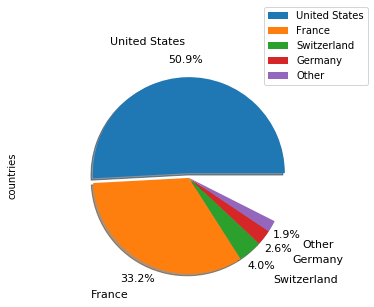

In [12]:
#Select top 5 countries in terms of food products
topCountries = healthData['countries'].value_counts(normalize = True, sort = True, dropna = True)[:5]

#Pie chart for top 5 food producing countries
explode = (0.05, 0, 0, 0, 0)
textprops = {'fontsize' : 11}

topCountries.plot(kind = 'pie', explode = explode, shadow = True, autopct='%0.1f%%', \
                  labeldistance = 1.37, pctdistance = 1.18, textprops = textprops)

plt.axis('equal')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.05, 1.3))
plt.show()

#### Bar Chart - Most additives used (worldwide)

Text(0.5, 1.0, 'Frequency of Additives in Products around the world')

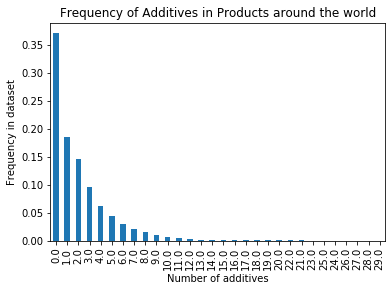

In [13]:
#Select products to check how many of them contain additives
numberAdditives = healthData['additives_n'].value_counts(normalize = True, sort = True, dropna = True)

#Bar chart for number of additives
numberAdditives.plot(kind = 'bar')
plt.xlabel('Number of additives')
plt.ylabel('Frequency in dataset')
plt.title('Frequency of Additives in Products around the world')

#### Bar Chart - Most additives used (USA)

Text(0.5, 1.0, 'Frequency of Additives in Products in the US')

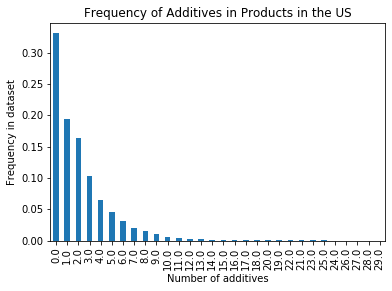

In [14]:
#Create new dataframe with only US data
usaData = healthData[healthData.countries == 'United States']

#Select the additives column in the US dataset
additivesUSA = usaData['additives_n'].value_counts(normalize = True, sort = True, dropna = True)

#Bar chart for USA
additivesUSA.plot(kind = 'bar')
plt.xlabel('Number of additives')
plt.ylabel('Frequency in dataset')
plt.title('Frequency of Additives in Products in the US')

#### Bar Chart - Most additives used (France)

Text(0.5, 1.0, 'Frequency of Additives in Products in France')

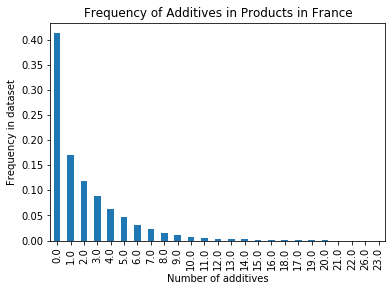

In [15]:
#Create new dataframe with only France
franceData = healthData[healthData.countries == 'France']

#Select the additives column in the France dataset
additivesFrance = franceData['additives_n'].value_counts(normalize = True, sort = True, dropna = True)

#Bar chart for additives in France
additivesFrance.plot(kind = 'bar')
plt.xlabel('Number of additives')
plt.ylabel('Frequency in dataset')
plt.title('Frequency of Additives in Products in France')

#### Box Plot - Additives USA vs. FR

(-2, 10)

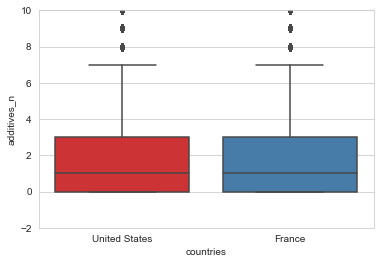

In [16]:
#Create new dataset for only US & FR
usfr = healthData[(healthData['countries'] == 'United States') | (healthData['countries'] ==  'France')]

#Box plot
sns.set_style("whitegrid")
ax = sns.boxplot(x = "countries", y = "additives_n", data = usfr, palette = "Set1")
ax.set_ylim((-2, 10)) #it can be seen that the median is the same for both groups showing that there should be no diff

#### Check Skewness (Symm/Non-symm) & Kurtosis (Peak/Flat)

In [17]:
print("The skewness of additives data for USA is: ", additivesUSA.skew()) # Right skewed
print("The skewness of additives data for FR is: ", additivesFrance.skew())# Right skewed

print("The kurtosis of additives data for USA is: ", additivesUSA.kurtosis()) # Observations more densley concent.
print("The kurtosis of additives data for FR is: ", additivesFrance.kurtosis()) # Observations more densley concent.

The skewness of additives data for USA is:  2.936519860758072
The skewness of additives data for FR is:  3.47646574085006
The kurtosis of additives data for USA is:  9.068317176474032
The kurtosis of additives data for FR is:  13.5444566353868


#### T-test

Ho: The 2 means are equal //
H1: The 2 means are not equal

small t score shows that the groups are similar
p-value is very high so there is no significance

In [18]:
#Import scipy library
from scipy.stats import ttest_ind

#Perform the test
stat, p = ttest_ind(additivesUSA, additivesFrance)
print('t=%.3f, p=%.3f' % (stat, p))

t=-0.304, p=0.763


#### Z-test

Ho: The 2 means are equal //
H1: The 2 means are not equal

In [19]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval = stests.ztest(additivesUSA, x2 = additivesFrance, value = 0 ,alternative = 'two-sided')

print(float(pval))
if pval<0.05:
    print("Reject Ho")
else:
    print("Fail to reject Ho") #mean of groups equal as can be seen in box plot
    
#Since z is low, the probability that Ho is true is high that we fail to reject H0
#Therefore, we can conclude that the 2 means are equal

0.7613417119258253
Fail to reject Ho


## Preparing the Data

#### Frequency & Cummulative Frequency table for products per country

In [20]:
occurences = healthData['countries'].value_counts(sort = True, dropna = True)
categories = occurences.index

table = pd.DataFrame(categories, columns = ['countries'])

table['n'] = occurences.values
table['f'] = table['n'] / len(healthData)

table = table.sort_values('n', ascending = False)
table['F'] = table['f'].cumsum()

print(table)

                 countries       n         f         F
0            United States  100138  0.508534  0.508534
1                   France   65321  0.331722  0.840256
2              Switzerland    7863  0.039931  0.880187
3                  Germany    5114  0.025971  0.906157
4                    Other    3813  0.019364  0.925521
5                    Spain    3112  0.015804  0.941325
6           United Kingdom    3000  0.015235  0.956560
7                  Belgium    1733  0.008801  0.965361
8                Australia    1375  0.006983  0.972343
9                    China    1214  0.006165  0.978508
10                  Russia     936  0.004753  0.983262
11                  Canada     590  0.002996  0.986258
12             Netherlands     446  0.002265  0.988523
13                Portugal     425  0.002158  0.990681
14                   Italy     382  0.001940  0.992621
15                  Brazil     281  0.001427  0.994048
16          Czech Republic     248  0.001259  0.995308
17        

#### Create new dataset based on frequencies (selecting up to 84% cummulative frequency)

In [21]:
#Create the dataframe
newData = healthData[(healthData['countries'] == 'United States') | (healthData['countries'] ==  'France')]

#Display head
newData.head()

,countries,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,additives_n,saturated-fat_100g,sugars_100g,salt_100g
product_name,,,,,,,,,
Banana Chips Sweetened (Whole),United States,28.57,64.29,3.6,3.57,0.0,28.57,14.29,0.00000
Organic Salted Nut Mix,United States,57.14,17.86,7.1,17.86,0.0,5.36,3.57,1.22428
Breadshop Honey Gone Nuts Granola,United States,18.27,63.46,7.7,13.46,0.0,1.92,11.54,NaN
Organic Dark Chocolate Minis,United States,37.50,55.00,7.5,5.00,0.0,22.50,42.50,NaN
Organic Adzuki Beans,United States,1.04,62.50,12.5,22.92,0.0,NaN,NaN,NaN


#### Take only the numerical features & replace nulls with column mean

In [22]:
#Take only the numerical features
foodData = newData[['fat_100g', 'carbohydrates_100g', 'fiber_100g', \
                        'proteins_100g', 'saturated-fat_100g', \
                        'sugars_100g', 'salt_100g']]

In [23]:
#Display type of data in each column
foodData.dtypes

#Display how many null values
foodData.info()

#Fill in null values with column's resepective mean
foodData = foodData.fillna(foodData.mean())

#Check to see no more null values
foodData.info()

#Display the data again
foodData.head()

<class 'pandas.core.frame.DataFrame'>
Index: 165459 entries, Banana Chips Sweetened (Whole) to Tomates aux Vermicelles 
Data columns (total 7 columns):
fat_100g              132087 non-null float64
carbohydrates_100g    131856 non-null float64
fiber_100g            115271 non-null float64
proteins_100g         144914 non-null float64
saturated-fat_100g    129072 non-null float64
sugars_100g           138173 non-null float64
salt_100g             143678 non-null float64
dtypes: float64(7)
memory usage: 10.1+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 165459 entries, Banana Chips Sweetened (Whole) to Tomates aux Vermicelles 
Data columns (total 7 columns):
fat_100g              165459 non-null float64
carbohydrates_100g    165459 non-null float64
fiber_100g            165459 non-null float64
proteins_100g         165459 non-null float64
saturated-fat_100g    165459 non-null float64
sugars_100g           165459 non-null float64
salt_100g             165459 non-null float64
dtypes: fl

,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,saturated-fat_100g,sugars_100g,salt_100g
product_name,,,,,,,
Banana Chips Sweetened (Whole),28.57,64.29,3.6,3.57,28.570000,14.29000,0.000000
Organic Salted Nut Mix,57.14,17.86,7.1,17.86,5.360000,3.57000,1.224280
Breadshop Honey Gone Nuts Granola,18.27,63.46,7.7,13.46,1.920000,11.54000,2.216366
Organic Dark Chocolate Minis,37.50,55.00,7.5,5.00,22.500000,42.50000,2.216366
Organic Adzuki Beans,1.04,62.50,12.5,22.92,5.176884,16.64773,2.216366


#### Describe the data to see if some tweaks are needed

In [24]:
foodData.describe()

,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,saturated-fat_100g,sugars_100g,salt_100g
count,165459.000000,165459.000000,165459.000000,165459.000000,165459.000000,165459.000000,165459.000000
mean,12.366749,33.930413,2.904233,7.137920,5.176884,16.647730,2.216366
std,14.460630,27.114324,13.795882,7.956954,7.056519,21.227762,158.945302
min,0.000000,0.000000,-6.700000,-800.000000,0.000000,-6.250000,0.000000
25%,1.000000,10.000000,0.200000,1.400000,0.200000,2.200000,0.104140
50%,11.970000,33.930413,2.904233,6.440000,4.300000,11.250000,0.810000
75%,15.710000,53.570000,2.904233,9.100000,5.360000,20.000000,2.026920
max,380.000000,2916.670000,5380.000000,430.000000,550.000000,3520.000000,64312.800000


It is oberved that there are some negative values which don't make sense because those features cannot contain negative amounts, thus I will exclude them from my analysis.

In [25]:
#Keep only positive values
foodData = foodData[(foodData[foodData.columns] >= 0).all(axis=1)]

In [26]:
#Describe the data again
foodData.describe()

,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,saturated-fat_100g,sugars_100g,salt_100g
count,165451.000000,165451.000000,165451.000000,165451.000000,165451.000000,165451.000000,165451.000000
mean,12.366900,33.931823,2.904321,7.145916,5.176857,16.648506,2.216206
std,14.460675,27.114179,13.796193,7.604148,7.056513,21.227934,158.949133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,0.200000,1.400000,0.200000,2.200000,0.104140
50%,11.970000,33.930413,2.904233,6.450000,4.300000,11.250000,0.810000
75%,15.710000,53.570000,2.904233,9.100000,5.360000,20.000000,2.026920
max,380.000000,2916.670000,5380.000000,430.000000,550.000000,3520.000000,64312.800000


From the max values we can see that we have several outliers, so best is to remove them

#### Detect and remove outliers (z-score method)

In [27]:
#Get array of z-scores for all features
from scipy import stats
z = np.abs(stats.zscore(foodData))
print(z)

[[1.12049742e+00 1.11964548e+00 5.04256124e-02 ... 3.31512392e+00
  1.11104218e-01 1.39429025e-02]
 [3.09620644e+00 5.92747872e-01 3.04119545e-01 ... 2.59538583e-02
  6.16100708e-01 6.24054086e-03]
 [4.08218704e-01 1.08903410e+00 3.47609934e-01 ... 4.61540541e-01
  2.40650892e-01 1.00868041e-06]
 ...
 [1.04425159e-05 5.20286371e-05 6.31790443e-06 ... 3.87039094e-06
  3.65739757e-05 1.00868041e-06]
 [8.55211601e-01 1.25144581e+00 2.10516719e-01 ... 7.33630439e-01
  7.84275846e-01 1.39429025e-02]
 [1.04425159e-05 5.20286371e-05 6.31790443e-06 ... 3.87039094e-06
  3.65739757e-05 1.00868041e-06]]


In [28]:
#Get only the z-score of the outliers (hence threshold > 3)
threshold = 3
print(np.where(z > 3))

(array([     0,      1,      7, ..., 165331, 165402, 165402]), array([4, 0, 3, ..., 5, 0, 4]))


In [29]:
#Create new dataset that excludes all outliers
foodData_o = foodData[(z < 3).all(axis=1)]

In [32]:
#Describe data to make sure
foodData_o.describe()

,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,saturated-fat_100g,sugars_100g,salt_100g
count,157157.000000,157157.000000,157157.000000,157157.000000,157157.000000,157157.000000,157157.000000
mean,11.095225,33.803769,2.785942,6.828970,4.665885,15.839221,1.719944
std,11.157803,25.515235,3.344429,6.339621,5.283290,17.648150,6.290700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.590000,0.400000,1.670000,0.200000,2.260000,0.120000
50%,11.180000,33.930413,2.904233,6.500000,4.000000,11.000000,0.830580
75%,14.290000,53.570000,2.904233,9.000000,5.176884,20.000000,2.040000
max,55.700000,100.000000,44.000000,29.940000,26.320000,80.300000,421.838120


## Build Models - Perform a Multivariate Analysis

### 1. PCA

#### Standardize the dataset

In [33]:
#Import standard scaler package
from sklearn.preprocessing import MinMaxScaler

#Standardize the dataset
scaler = MinMaxScaler(feature_range = (0,1))
foodData_scaled = scaler.fit_transform(foodData_o)
foodData_scaled

#Return array back into pandas dataframe and describe
pd.DataFrame(foodData_scaled, columns = foodData_o.columns).describe().round(2)

,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,saturated-fat_100g,sugars_100g,salt_100g
count,157157.00,157157.00,157157.00,157157.00,157157.00,157157.00,157157.00
mean,0.20,0.34,0.06,0.23,0.18,0.20,0.00
std,0.20,0.26,0.08,0.21,0.20,0.22,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.02,0.11,0.01,0.06,0.01,0.03,0.00
50%,0.20,0.34,0.07,0.22,0.15,0.14,0.00
75%,0.26,0.54,0.07,0.30,0.20,0.25,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


#### Density plot for all features after standardizing

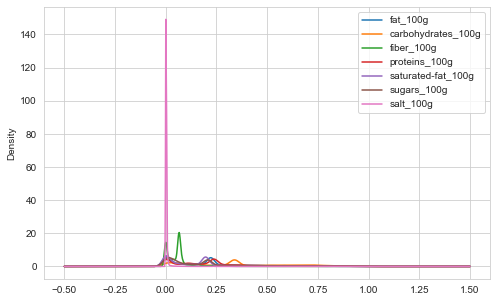

In [34]:
pd.DataFrame(foodData_scaled, columns = foodData_o.columns).plot(kind = 'density', sharex = True, figsize = (8,5), layout = (10,1))

#### Perform the PCA

In [35]:
#Import PCA package
from sklearn.decomposition import PCA

#Perform the PCA
num_components = 7

pca = PCA(n_components = num_components) #create PCA model
pca.fit(foodData_scaled) #fit the model with the standardized data

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### Analyze the PCA results

#### 1. Explained Variance Ratio (EVR)

In [36]:
#Generate the array
pca.explained_variance_ratio_.round(2) #you can see that the highest variance is PC1

array([0.38, 0.32, 0.16, 0.07, 0.05, 0.02, 0.  ])

In [38]:
#Calculate CUM EVR
pca.explained_variance_ratio_.cumsum().round(2) #PC1 explains 38%; PC1 & PC2 explain 70%, etc.

array([0.38, 0.7 , 0.86, 0.93, 0.98, 1.  , 1.  ])

#### 2. Scree Plot (*shows how many PC to keep*)

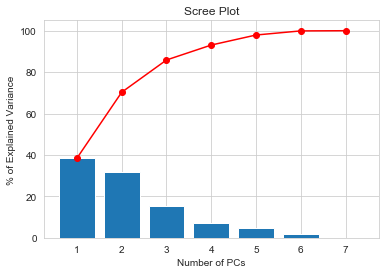

In [39]:
#Scree Plot Function
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree)) + 1, scree)
    plt.plot(np.arange(len(scree)) +1, scree.cumsum(), c = 'red', marker = 'o')
    plt.xlabel('Number of PCs')
    plt.ylabel('% of Explained Variance')
    plt.title('Scree Plot')
    plt.show(block = False)
    
#Display Scree Plot
display_scree_plot(pca)  #from the graph we can see that the 3 PCs explain 80% ~ so keep 3 and disregard others

Based on the score of the scree plot, 3 PCs explain 80% of the variance therefore I will create a new model that has 3 as a number of components

In [40]:
#Create new model with 3 components only
pca = PCA(n_components = 3)

#Fit the model again
pca.fit(foodData_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### 3. Component Scores

In [41]:
pca.transform(foodData_scaled)

array([[ 0.15783881,  0.1297192 ,  0.3491992 ],
       [ 0.52431175,  0.62872579, -0.39475403],
       [ 0.13368738,  0.17307581,  0.53595312],
       ...,
       [ 0.0108419 ,  0.0303374 , -0.0071519 ],
       [-0.38923055, -0.32125057, -0.15527941],
       [ 0.0108419 ,  0.0303374 , -0.0071519 ]])

In [42]:
scores_pca = pca.transform(foodData_scaled)

In [43]:
#Produce 4 component scores
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]

#### 4. Correlation Circle

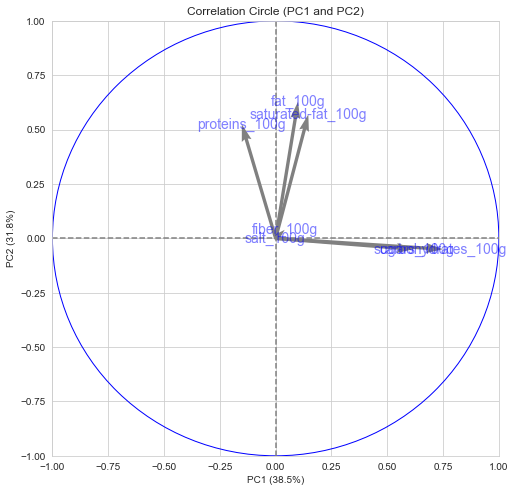

In [48]:
#Import package
from matplotlib.collections import LineCollection

#Define correlation circle function
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    #For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            #Initialize the matplotlib figure
            fig, ax = plt.subplots(figsize=(8,8))

            #Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            #Add arrows
            #If there are more than 30 arrows, do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            #Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            #Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            #Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            #Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            #Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show()
            

#Display correlation circle
pcs = pca.components_
display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(foodData_o.columns), )

### 2. KNN Algorithm

In [49]:
from sklearn.cluster import KMeans

#Fit Kmeans using transformed data from PCA
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

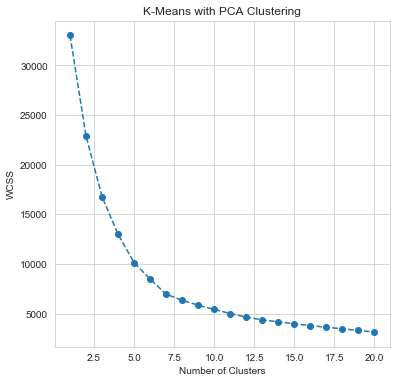

In [50]:
#Plot WCSS again the number of components
plt.figure(figsize = (6,6))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means with PCA Clustering')
plt.show()

From the above elbow curve, I have chose 5 clusters, so I will run K-Means cluster with number of clusters equal 5

#### Initialize Model

In [51]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

#### Fit data with KMeans PCA Model

In [52]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

#### Analyzing PCA & KMeans Results

In [55]:
#Create new dataframe with original features and add the PCA scores and assigned clusters
df_seg_pca_kmeans = pd.concat([foodData_o.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_seg_pca_kmeans.columns.values[-3: ] = ['PC1', 'PC2', 'PC3']

#Add last column that contains pca k-means clustering label
df_seg_pca_kmeans['cluster'] = kmeans_pca.labels_

df_seg_pca_kmeans

,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,saturated-fat_100g,sugars_100g,salt_100g,PC1,PC2,PC3,cluster
0,18.270000,63.460000,7.700000,13.46000,1.920000,11.54000,2.216366,0.157839,0.129719,0.349199,3
1,37.500000,55.000000,7.500000,5.00000,22.500000,42.50000,2.216366,0.524312,0.628726,-0.394754,4
2,1.040000,62.500000,12.500000,22.92000,5.176884,16.64773,2.216366,0.133687,0.173076,0.535953,3
3,1.750000,73.680000,1.800000,14.04000,5.176884,16.64773,2.216366,0.253833,0.010560,0.360688,3
4,36.670000,36.670000,6.700000,16.67000,5.000000,3.33000,1.607820,-0.073140,0.477632,0.220438,2
...,...,...,...,...,...,...,...,...,...,...,...
157152,0.200000,0.500000,0.200000,0.50000,0.200000,0.50000,0.025400,-0.382507,-0.306302,-0.147025,1
157153,12.366749,33.930413,2.904233,7.13792,5.176884,16.64773,2.216366,0.010842,0.030337,-0.007152,3
157154,12.366749,33.930413,2.904233,7.13792,5.176884,16.64773,2.216366,0.010842,0.030337,-0.007152,3
157155,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,-0.389231,-0.321251,-0.155279,1


#### Check how many data points are assigned to each cluster

In [56]:
df_seg_pca_kmeans['cluster'].value_counts()

3    55600
1    50778
2    18471
0    17071
4    15237
Name: cluster, dtype: int64

#### Show cluster centers

In [57]:
centers_reduced = kmeans_pca.cluster_centers_
print(centers_reduced)

[[ 0.54184181 -0.23257415  0.02868296]
 [-0.24102806 -0.20294702 -0.10369608]
 [-0.27900238  0.46946145  0.0788039 ]
 [ 0.03618537  0.00736819  0.11649835]
 [ 0.40161557  0.34180888 -0.20703975]]


#### Plot data by PCA components

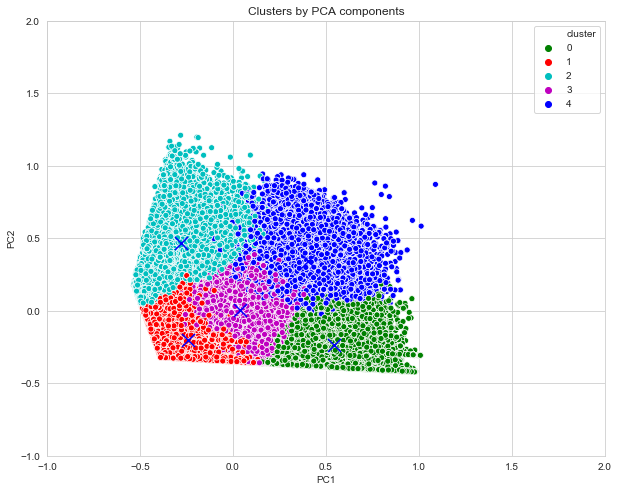

In [61]:
x_axis = df_seg_pca_kmeans['PC1']
y_axis = df_seg_pca_kmeans['PC2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['cluster'], palette = ['g', 'r', 'c', 'm', 'b'])
plt.title('Clusters by PCA components')
plt.ylim((-1,2))
plt.xlim((-1, 2))
plt.scatter(centers_reduced[:,0], centers_reduced[:,1], marker = 'x', s = 169, linewidths = 5, color = 'b', zorder = 10)
plt.show()

#### Parallel Coordinates Plot

#### Take subset of dataset

In [62]:
subsetData = df_seg_pca_kmeans.iloc[0:5000, :]
subsetData.head()

,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,saturated-fat_100g,sugars_100g,salt_100g,PC1,PC2,PC3,cluster
0,18.27,63.46,7.7,13.46,1.920000,11.54000,2.216366,0.157839,0.129719,0.349199,3
1,37.50,55.00,7.5,5.00,22.500000,42.50000,2.216366,0.524312,0.628726,-0.394754,4
2,1.04,62.50,12.5,22.92,5.176884,16.64773,2.216366,0.133687,0.173076,0.535953,3
3,1.75,73.68,1.8,14.04,5.176884,16.64773,2.216366,0.253833,0.010560,0.360688,3
4,36.67,36.67,6.7,16.67,5.000000,3.33000,1.607820,-0.073140,0.477632,0.220438,2


In [63]:
subsetData['cluster'].value_counts()

1    1688
3    1345
0     859
4     584
2     524
Name: cluster, dtype: int64

In [64]:
subsetData_coord = subsetData[['fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', \
                              'saturated-fat_100g', 'sugars_100g', 'salt_100g', 'cluster']]

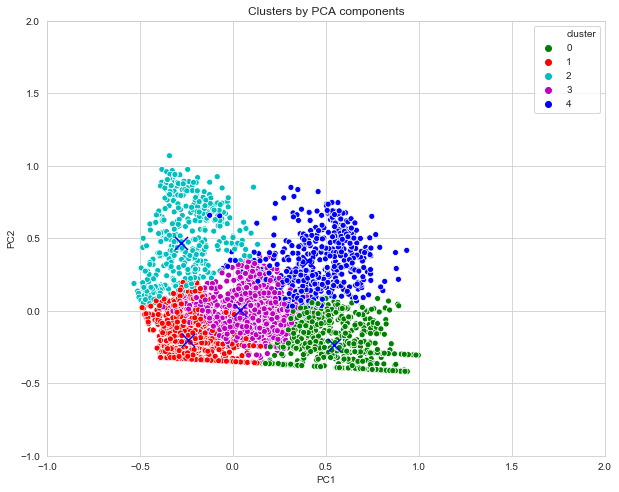

In [67]:
#Plot data by PCA components
x_axis = subsetData['PC1']
y_axis = subsetData['PC2']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = subsetData['cluster'], palette = ['g', 'r', 'c', 'm', 'b'])
plt.title('Clusters by PCA components')
plt.ylim((-1,2))
plt.xlim((-1, 2))
plt.scatter(centers_reduced[:,0], centers_reduced[:,1], marker = 'x', s = 169, linewidths = 5, color = 'b', zorder = 10)
plt.show()

#### Define function for parallel coordinates plot

In [68]:
from pandas.plotting import parallel_coordinates

palette = sns.color_palette("bright", 10)

def addAlpha(colour, alpha):
    '''Add an alpha to the RGB colour'''
    
    return (colour[0],colour[1],colour[2],alpha)

def display_parallel_coordinates(df, num_clusters):
    '''Display a parallel coordinates plot for the clusters in df'''

    #Select data points for individual clusters
    cluster_points = []
    for i in range(num_clusters):
        cluster_points.append(df[df.cluster==i])
    
    #Create the plot
    fig = plt.figure(figsize=(12, 15))
    title = fig.suptitle("Parallel Coordinates Plot for the Clusters", fontsize=18)
    fig.subplots_adjust(top=0.95, wspace=0)

    #Display one plot for each cluster, with the lines for the main cluster appearing over the lines for the other clusters
    for i in range(num_clusters):    
        plt.subplot(num_clusters, 1, i+1)
        for j,c in enumerate(cluster_points): 
            if i!= j:
                pc = parallel_coordinates(c, 'cluster', color=[addAlpha(palette[j],0.2)])
        pc = parallel_coordinates(cluster_points[i], 'cluster', color=[addAlpha(palette[i],0.5)])

        #Stagger the axes
        ax=plt.gca()
        for tick in ax.xaxis.get_major_ticks()[1::2]:
            tick.set_pad(20)

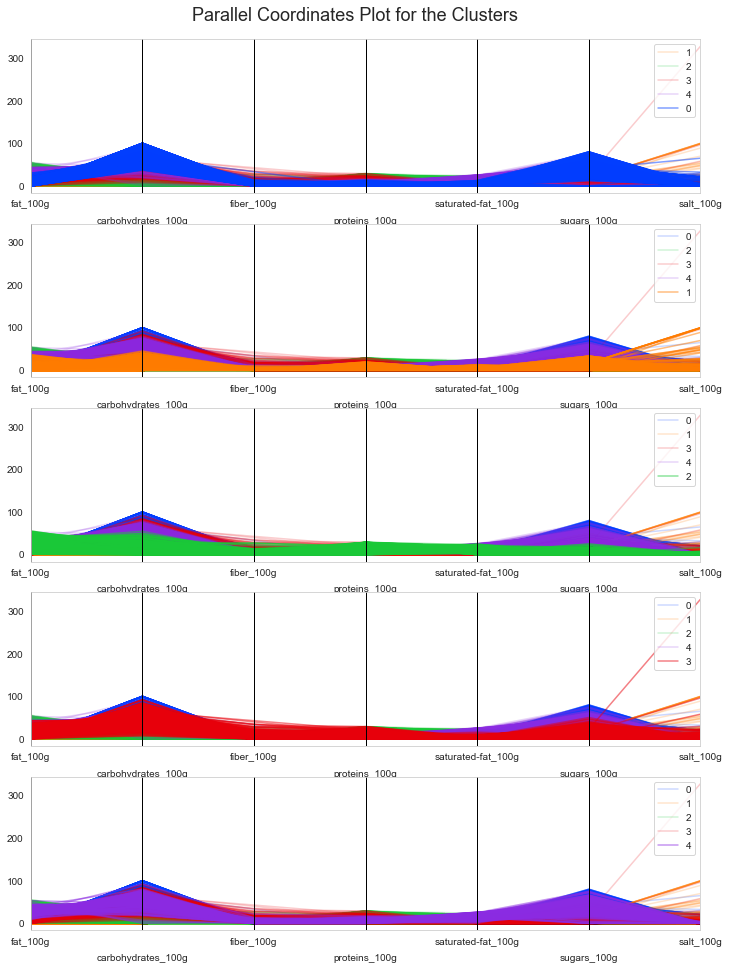

In [69]:
#Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(subsetData_coord, 5)